In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
data = pd.read_csv('file.csv')

In [3]:
data.head()

product_id         user_id                     profile_name  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
2  B000UA0QIQ  A395BORC6FGVXV                             Karl   
3  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
4  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   

   helpfulness_numerator  helpfulness_denominator  rating        time  \
0                      1                        1       5  1303862400   
1                      1                        1       4  1219017600   
2                      3                        3       2  1307923200   
3                      1                        1       5  1322006400   
4                      1                        1       5  1107820800   

                    review_summary  \
0            Good Quality Dog Food   
1            "Delight" says it all   
2                   Cough Medicine   
3                       Yay Barley   
4  The Best Hot Sauce in the World   

                                         review_text  helpfulness sentiment  \
0  I have bought several of the Vitality canned d...          1.0  positive   
1  This is a confection that has been around a fe...          1.0  positive   
2  If you are looking for the secret ingredient i...          1.0  negative   
3  Right now I'm mostly just sprouting this so my...          1.0  positive   
4  I don't know if it's the cactus or the tequila...          1.0  positive   

  usefulness  
0       >75%  
1       >75%  
2       >75%  
3       >75%  
4       >75%

# Exploratory Data Analysis

## Positive reviews are very common


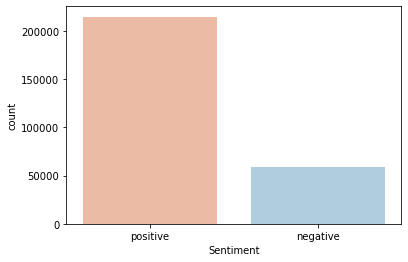

In [4]:
sns.countplot(x='sentiment', order=["positive", "negative"], data=data, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()


## Distribution of Rating

In [5]:
# people who have give 5 rating are all positive sentiment
data[data['rating']==5].sentiment.value_counts()

positive    176379
Name: sentiment, dtype: int64

In [6]:
# people who have give 1 rating are all negative sentiment

data[data['rating']==1].sentiment.value_counts()

negative    40002
Name: sentiment, dtype: int64

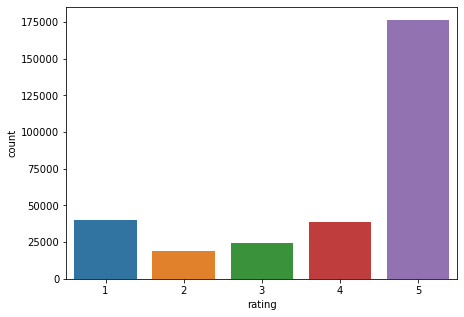

In [7]:
plt.figure(figsize = (7,5))
sns.countplot(x ='rating', data = data,);


## Among all reviews, almost half (50%) are not voted on at all.
## Among reviews that are voted on, helpful reviews(>75%) are the most common


In [8]:
# There 202836 useful reviews
data['usefulness'].value_counts()

>75%      202836
25-75%     57286
<25%       38280
Name: usefulness, dtype: int64

In [9]:
# Out of more than 75% of usefull review 142954 are five star rating
data[data['usefulness']=='>75%'].rating.value_counts()

5    142954
4     27293
1     13630
3     11536
2      7423
Name: rating, dtype: int64

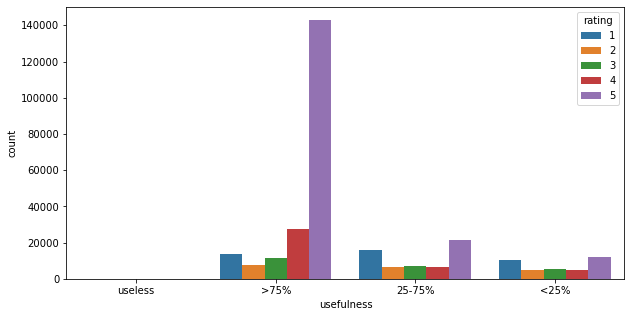

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=data,hue='rating');


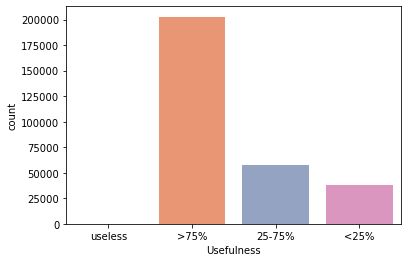

In [11]:
sns.countplot(x='usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=data, palette=sns.color_palette("Set2"))
plt.xlabel('Usefulness')
plt.show()

## Positive reviews are found more helpful


In [12]:
# There are more number of positive sentiments
data['sentiment'].value_counts()

positive       215018
negative        59167
not defined     24217
Name: sentiment, dtype: int64

In [13]:
# There are 170247 positive statements are usefull
data[data['sentiment']=='positive'].usefulness.value_counts()

>75%      170247
25-75%     27755
<25%       17016
Name: usefulness, dtype: int64

In [14]:
# There are 21053 negative statements are usefull
data[data['sentiment']=='negative'].usefulness.value_counts()

25-75%    22412
>75%      21053
<25%      15702
Name: usefulness, dtype: int64

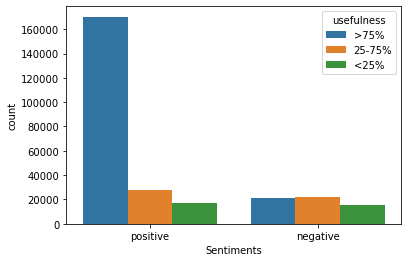

In [15]:
sns.countplot(x='sentiment',hue = 'usefulness' , order=['positive','negative'],hue_order=['>75%', '25-75%', '<25%'], data=data)
plt.xlabel('Sentiments')
plt.show()

## Popular words in Review

- A look at the post popular words in positive (4-5 stars) and negative (1-2 stars) reviews shows that both positive and negative reviews share many popular words, such as "coffee", "taste", "flavor", "price", "good", and "product." The words "good", "great", "love", "favorite", and "find" are indicative of positive reviews, while negative reviews contain words such as "didn't" and "disappointed", but these distinguishing words appear less frequently than distinguishing words in positive reviews.

In [16]:
# Selecting the setenses with positive and negative sentimentes so that we classify negative and positive words

pos = data.loc[data['sentiment'] == 'positive']
pos = pos[0:25000]

neg = data.loc[data['sentiment'] == 'negative']
neg = neg[0:25000]

In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt


def create_Word_Corpus(data):
    words_corpus = ''
    for val in data["review_summary"]:
        text = str(val).lower()
        tokens = []
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + ' ' + words
    return words_corpus
        
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))


In [20]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='w', bbox_inches='tight')

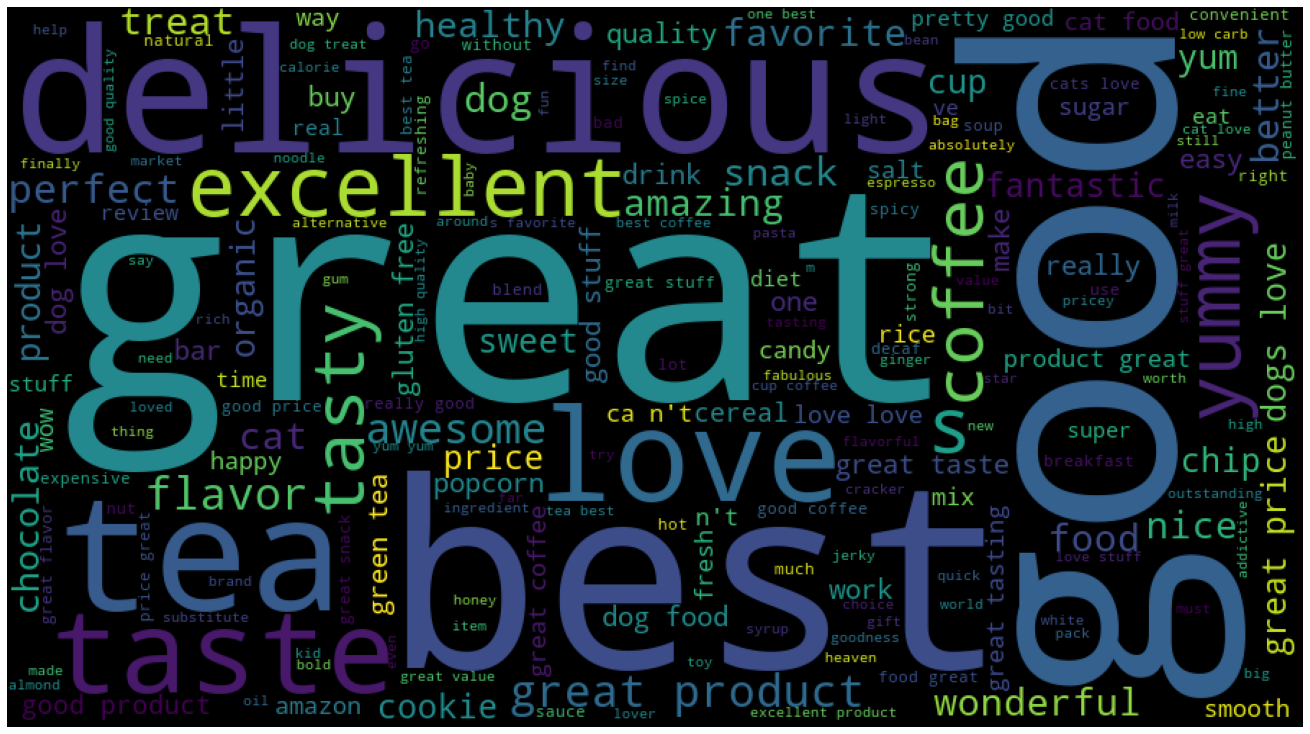

<Figure size 432x288 with 0 Axes>

In [21]:
# Visualizing popular positive words
plot_Cloud(pos_wordcloud)
plt.show()

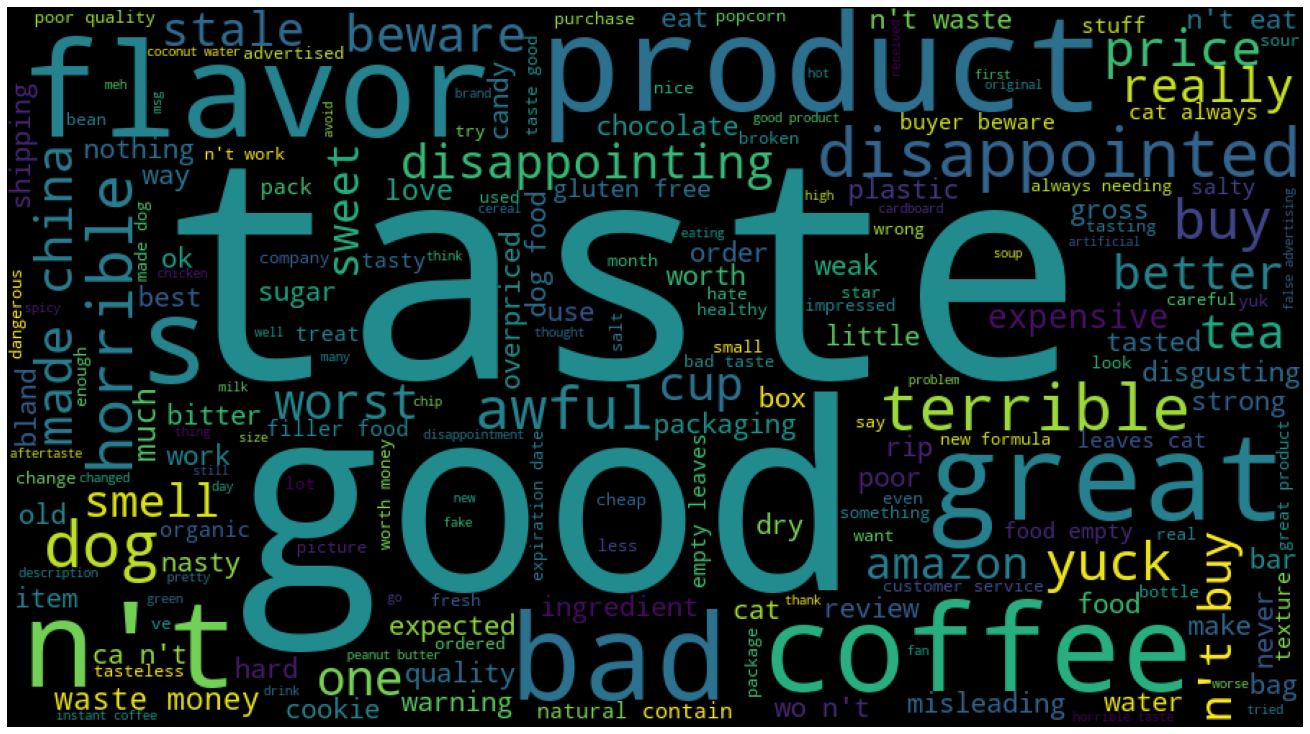

<Figure size 432x288 with 0 Axes>

In [22]:
# Visualizing popular negative words
plot_Cloud(neg_wordcloud)
plt.show()

In [23]:
# Depending on rating creating word corpus

data1 = data[data['rating']==1]

rating1_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(data1))


In [24]:
data2 = data[data['rating']==2]

rating2_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(data2))


In [25]:
data3 = data[data['rating']==3]


rating3_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(data3))


In [26]:
data4 = data[data['rating']==4]

rating4_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(data4))


In [27]:
data5 = data[data['rating']==5]
rating5_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(data5))


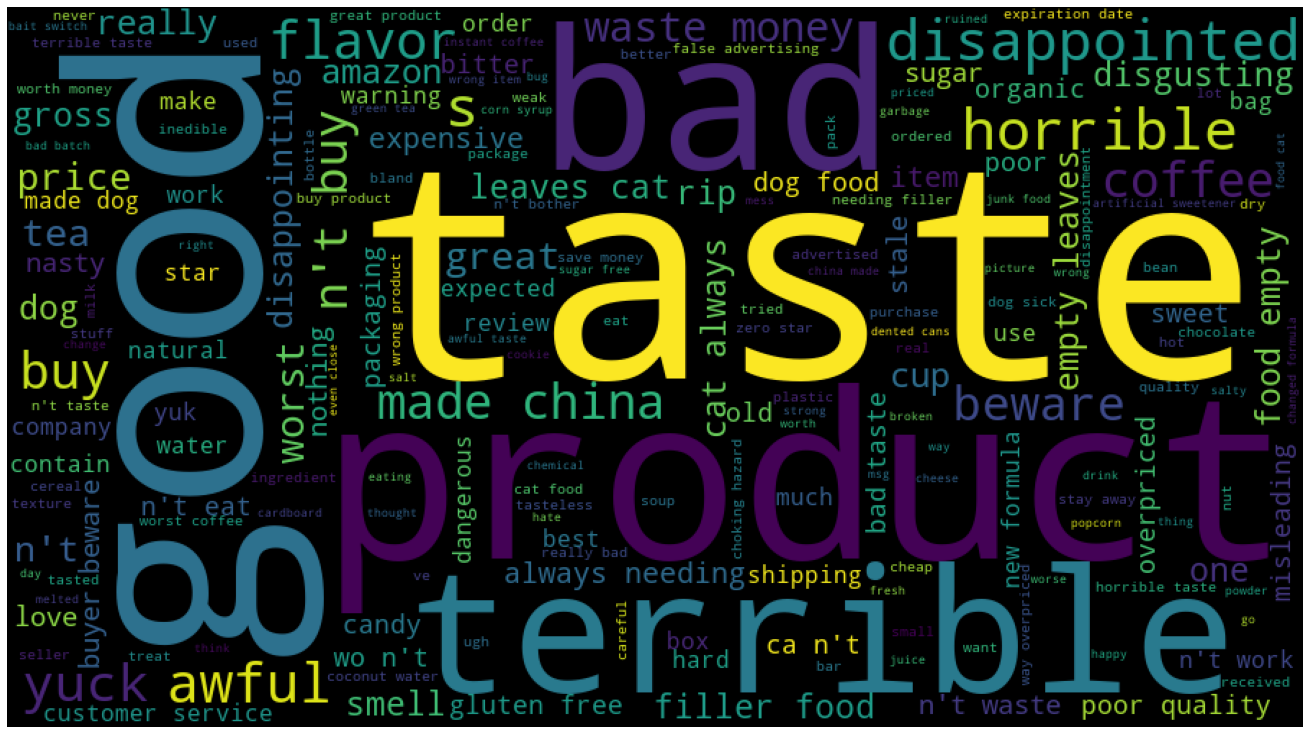

<Figure size 432x288 with 0 Axes>

In [28]:
# Visualizing words in rating 1
plot_Cloud(rating1_wordcloud)
plt.show()

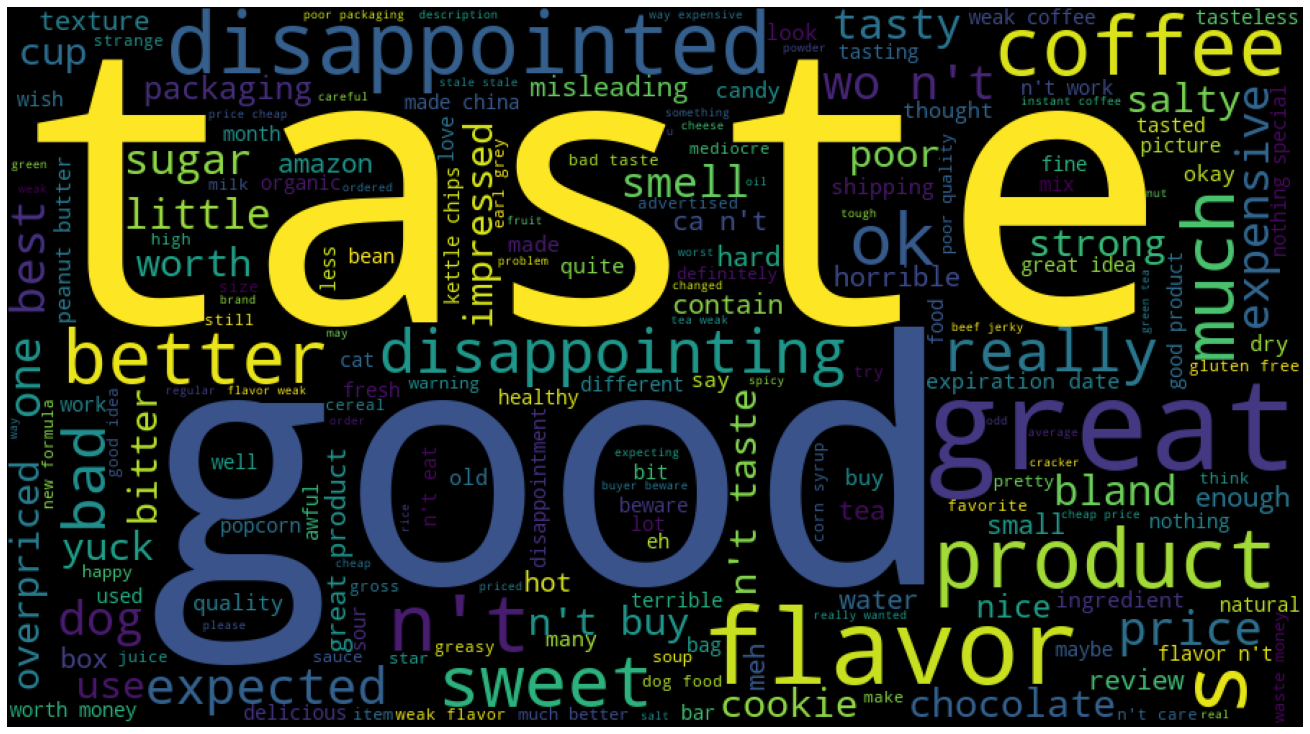

<Figure size 432x288 with 0 Axes>

In [29]:
# Visualizing words in rating 2
plot_Cloud(rating2_wordcloud)
plt.show()

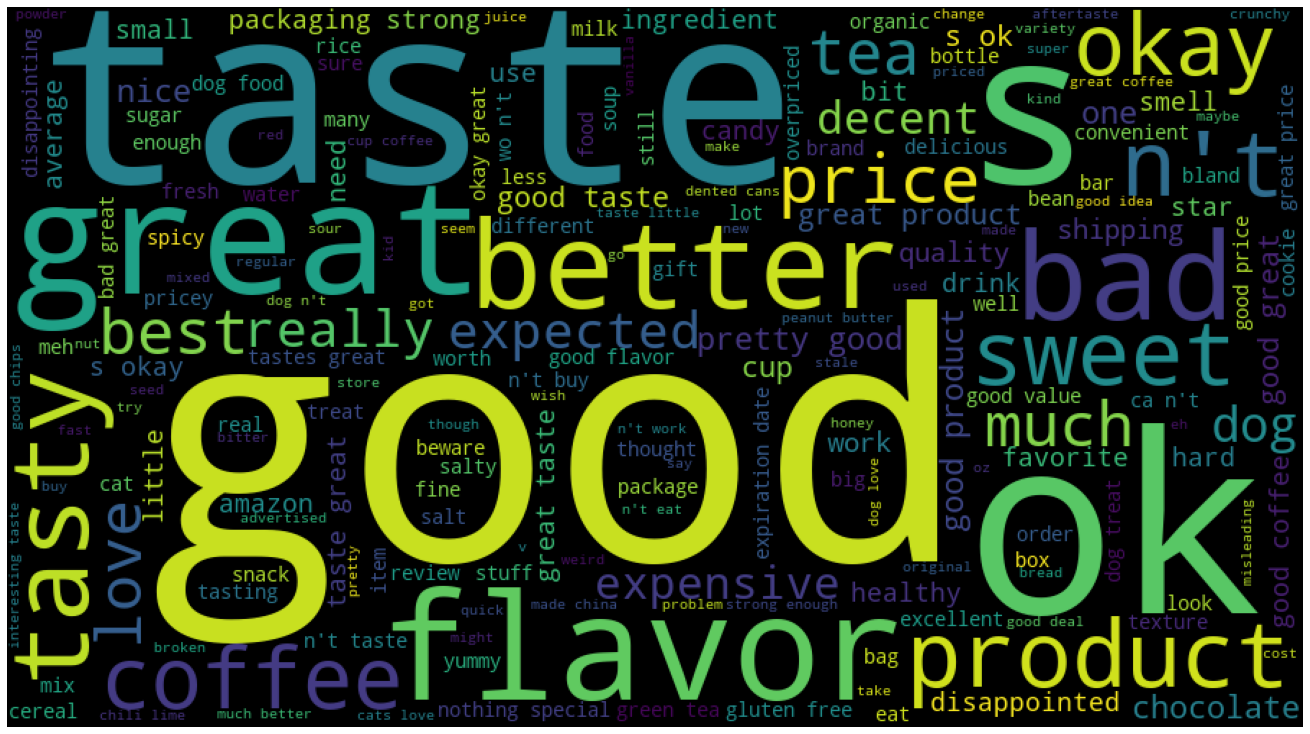

<Figure size 432x288 with 0 Axes>

In [30]:
# Visualizing words in rating 3
plot_Cloud(rating3_wordcloud)
plt.show()

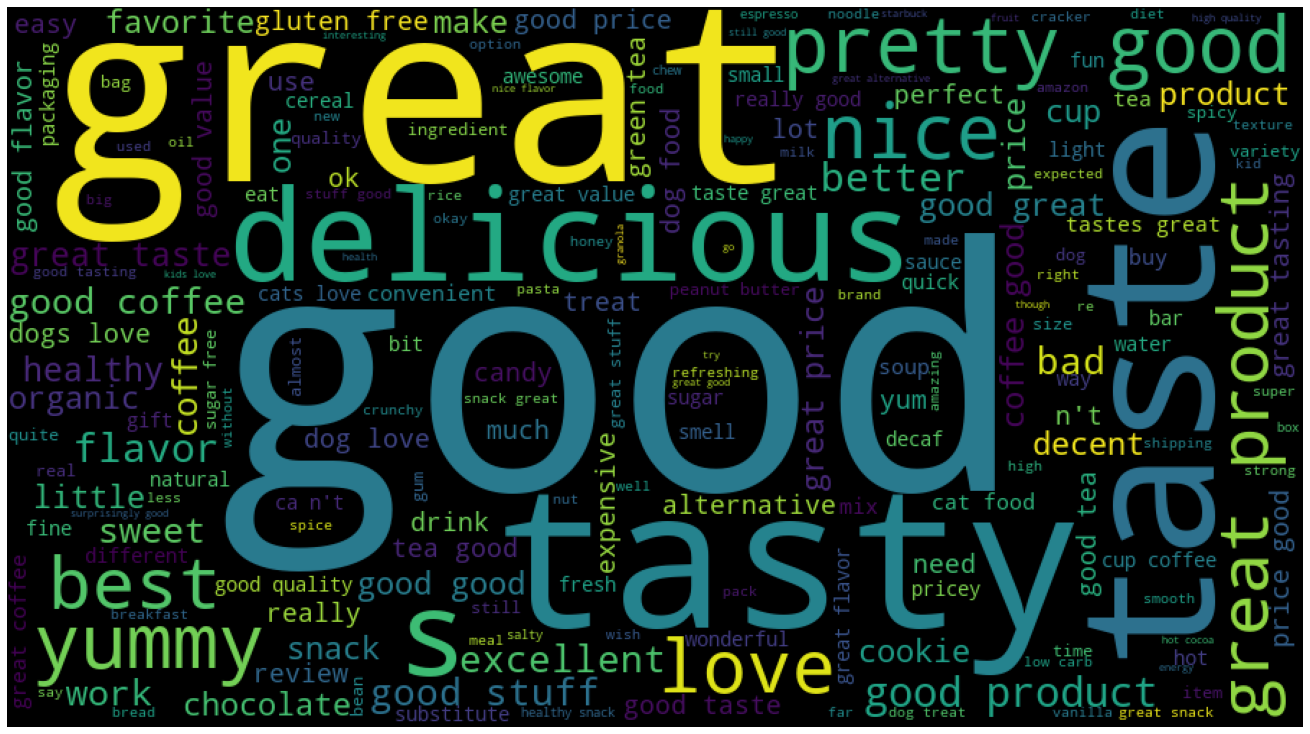

<Figure size 432x288 with 0 Axes>

In [31]:
# Visualizing words in rating 4
plot_Cloud(rating4_wordcloud)
plt.show()

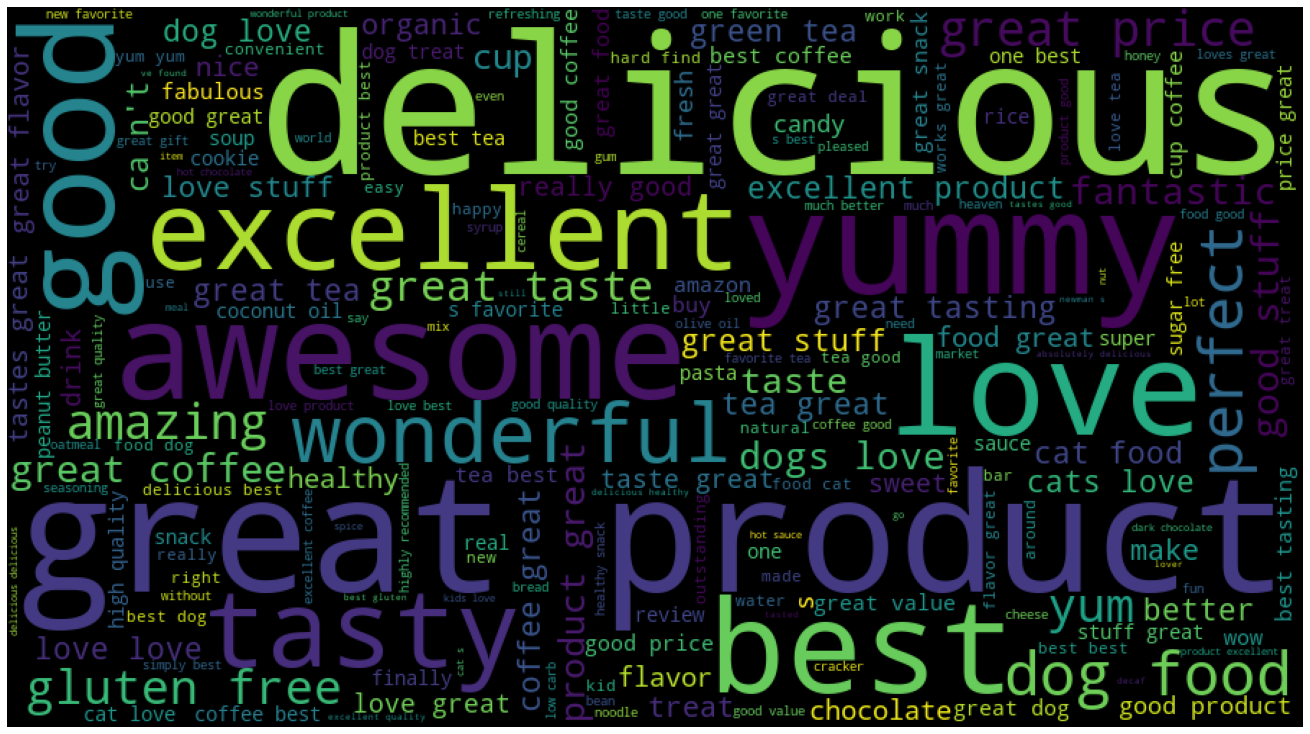

<Figure size 432x288 with 0 Axes>

In [32]:
# Visualizing words in rating 5
plot_Cloud(rating5_wordcloud)
plt.show()

# Model Building

In [33]:
data.head()

product_id         user_id                     profile_name  \
0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
2  B000UA0QIQ  A395BORC6FGVXV                             Karl   
3  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
4  B0001PB9FE  A3HDKO7OW0QNK4                     Canadian Fan   

   helpfulness_numerator  helpfulness_denominator  rating        time  \
0                      1                        1       5  1303862400   
1                      1                        1       4  1219017600   
2                      3                        3       2  1307923200   
3                      1                        1       5  1322006400   
4                      1                        1       5  1107820800   

                    review_summary  \
0            Good Quality Dog Food   
1            "Delight" says it all   
2                   Cough Medicine   
3                       Yay Barley   
4  The Best Hot Sauce in the World   

                                         review_text  helpfulness sentiment  \
0  I have bought several of the Vitality canned d...          1.0  positive   
1  This is a confection that has been around a fe...          1.0  positive   
2  If you are looking for the secret ingredient i...          1.0  negative   
3  Right now I'm mostly just sprouting this so my...          1.0  positive   
4  I don't know if it's the cactus or the tequila...          1.0  positive   

  usefulness  
0       >75%  
1       >75%  
2       >75%  
3       >75%  
4       >75%

In [66]:
data = pd.read_csv('file.csv')

In [67]:
newdata = data

In [68]:
newdata = newdata.rename(columns={'review_summary':'summary','review_text':'text'})

In [69]:
newdata.drop('profile_name',axis=1,inplace = True)
newdata.drop('product_id',axis=1,inplace = True)
newdata.drop('helpfulness_numerator',axis=1,inplace = True)
newdata.drop('helpfulness_denominator',axis=1,inplace = True)
newdata.drop('helpfulness',axis=1,inplace = True)
newdata.drop('sentiment',axis=1,inplace = True)
newdata.drop('usefulness',axis=1,inplace = True)
newdata.drop('time',axis=1,inplace = True)
newdata.drop('user_id',axis=1,inplace = True)

In [70]:
newdata.rating.value_counts()

5    176379
1     40002
4     38639
3     24217
2     19165
Name: rating, dtype: int64

In [71]:
newdata['rating'] = newdata['rating'].apply(lambda x : 'Negative' if x<3 else('Positive' if x>3 else x))

In [72]:
newdata.drop(newdata[newdata['rating']==3].index,inplace = True)

In [73]:
newdata['rating'].unique()

array(['Positive', 'Negative'], dtype=object)

In [74]:
newdata.isnull().sum()

rating      0
summary    55
text        8
dtype: int64

In [75]:
newdata.dropna(how = 'any',inplace = True)

In [76]:
newdata.isnull().sum()

rating     0
summary    0
text       0
dtype: int64

In [77]:
newdata.rating.value_counts(normalize = True)

Positive    0.784297
Negative    0.215703
Name: rating, dtype: float64

# Text Preprocessing

In [78]:
X = newdata[['summary','text']]

In [79]:
X.shape

(274122, 2)

In [80]:
y = newdata[['rating']]

In [81]:
y.shape

(274122, 1)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=12345)

In [83]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(191885, 2) (82237, 2) (191885, 1) (82237, 1)


In [84]:
X_train

summary  \
99138   great product, bad packaging   
14628               Excellent Buy!!!   
63295                     total crap   
231122                overpriced!!!!   
188970         Best oolong I've had.   
...                              ...   
173101                 Made in China   
52293              Great SPICY Soup!   
94183     Fruity, Chewy, and Yummy!!   
84289            Nice and strong....   
236812                rancid product   

                                                     text  
99138   My daughter loves these puffs, and I like that...  
14628   I love the hot, spicy taste of Wasabi peas and...  
63295   The only reason this gets one star is because ...  
231122  You would be crazy to pay this price... you ca...  
188970  I really enjoy this tea.  Has the best flavor ...  
...                                                   ...  
173101  For those who are concerned about where their ...  
52293   Love this soup!  Boil water, add a spice packe...  
94183   Florida's Natural Nuggets are the best snack e...  
84289   This coffee is like none I have ever had. For ...  
236812  This good product is sold rancid ,I was asking...  

[191885 rows x 2 columns]

In [93]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# !pip install tqdm


In [94]:
# ## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [95]:
# We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [96]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
# Convert to series
X_train['text'].apply(lambda x: preprocess(x, 'stem'))


In [ ]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()


In [ ]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

In [ ]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()


In [ ]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()


## Preprocessing the Test Data

In [ ]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

In [ ]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

In [ ]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

# Using Bag of Words to form dtm

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(ngram_range=(1,4))

X_train_dtm = vector.fit_transform(X_train.clean_text_lemma)

In [ ]:
X_test_dtm = vector.transform(X_test.clean_text_lemma)


In [ ]:
print(X_train_dtm.shape,X_test_dtm.shape)

# Using Logistic Regression for Predicting Acurracy

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [ ]:
logistic.fit(X_train_dtm, y_train)

In [ ]:

y_test_pred= logistic.predict(X_test_dtm)


In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)


In [ ]:
confusion_mat = metrics.confusion_matrix(y_test, y_test_pred)
confusion_mat

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()


In [ ]:
print(metrics.classification_report(y_test, y_test_pred))


# Using SVM using RBF Kernel

In [ ]:
from sklearn.svm import SVC

svc_classifier = SVC()

In [ ]:
svc_classifier.fit(X_train_dtm, y_train)


In [ ]:
y_test_pred = svc_classifier.predict(X_test)


In [ ]:
metrics.accuracy_score(y_test,y_test_pred)


In [ ]:
metrics.confusion_matrix(y_test,y_test_pred)


In [ ]:
sns.heatmap(y_test_pred, annot=True, fmt='d')
plt.title("Confusion Matrix of RBF Kernel SVC")
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_test_pred))


# SVM using Liner Kernel

In [ ]:
from sklearn.svm import SVC
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train_dtm,y_train)

In [ ]:
y_pred_linear = svc_linear.predict(X_test_dtm)


In [ ]:
metrics.accuracy_score(y_test, y_pred_linear)


In [ ]:
con_metrics_svc_linear = metrics.confusion_matrix(y_test, y_pred_linear)
con_metrics_svc_linear


In [ ]:
sns.heatmap(con_metrics_svc_linear, annot=True, fmt='d')
plt.title("Confusion Matrix of SVC Linear Kernel")
plt.show()


In [ ]:
print(metrics.classification_report(y_test, y_pred_linear))


In [ ]:
metrics.loprint(metrics.classification_report(y_test, y_pred_linear))
g_loss(y_test, y_pred_linear)


# Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(X_train_dtm,y_train)

In [ ]:
y_pred= classifier_dt.predict(X_test_dtm)  


In [ ]:
metrics.accuracy_score(y_test, y_pred)


In [ ]:
con_metrics_dt = metrics.confusion_matrix(y_test, y_pred)
con_metrics_dt


In [ ]:
sns.heatmap(con_metrics_dt, annot=True, fmt='d')
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))


## Using Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(X_train,y_train)

In [ ]:
y_train_predict = naive.predict(X_train)

In [ ]:
score1 = accuracy_score(y_train,y_train_predict)
score1

In [ ]:
y_test_predict = naive.predict(X_test)

In [ ]:
score2 = accuracy_score(y_test,y_test_predict)
score2

In [ ]:
con_mat = metrics.confusion_matrix(y_test,y_test_predict)


In [ ]:
sns.heatmap(con_mat, annot=True, fmt='d')
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_test_predict))
